<a href="https://colab.research.google.com/github/aripenguin/Data602/blob/main/assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10**

In [4]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [11]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()
#boston = ignoring boston

**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [21]:
print("The feature names of the iris dataset are: ", iris.feature_names)

#if I convert the dataset into a pandas dataframe, I can easily print out the first part of Q1
df_iris = pd.DataFrame(data=iris.data,
                  columns=iris.feature_names)
print(df_iris.head())

#The separate Python list containing target names
print(iris.target_names)


The feature names of the iris dataset are:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa' 'versicolor' 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [48]:
#add a new dataframe column for the the target names not numbers
df_iris['target'] = iris.target
print(df_iris.head())
c = 0
for t in df_iris['target']:
    if t == 0:
      df_iris['target'][c] = 'setosa'
    elif t == 1:
      df_iris['target'][c] = 'versicolor'
    else:
      df_iris['target'][c] = 'virginica'
    c+=1
#to see that its worked
print(df_iris['target'])

#make our X and y
X = df_iris.iloc[:, :-1]#all the feature data, no target
y = df_iris.iloc[:, -1]#only target data, could have done df_iris['target'] also

knn = KNN(n_neighbors = 5)
knn.fit(X, y)
new_observations = knn.predict(X)
print(new_observations)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'seto

<ipython-input-48-ce22ad0cf737>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris['target'][c] = 'setosa'


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [50]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 0, shuffle = True)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.9777777777777777

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

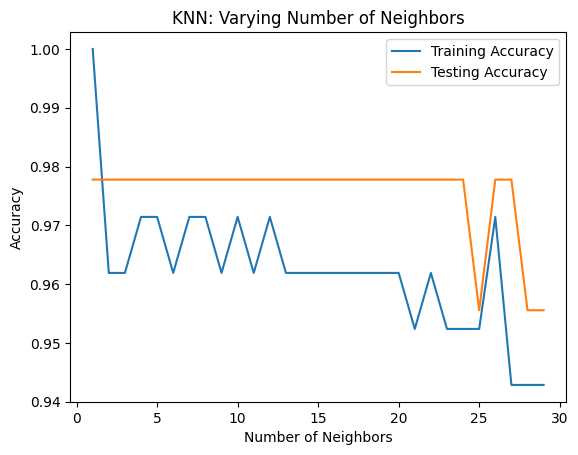

In [52]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,30)

for neighbor in neighbors:
  knn = KNN(n_neighbors = neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

#Plot the curves
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()
